In [100]:
# Importing Libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings
import nasdaqdatalink
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [101]:
# Importing Sample Data set to complete exercise
df = pd.read_csv(r'C:\Users\steph\OneDrive\Documents\Sept 2022 World University Rankings\02 Data\Original Data\sample.csv', index_col = False)

In [102]:
# Examining sample data set
df.head(5)

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,16010072.12,12729.0,1257.763541,30024676.0
1,01.02.2015,15807587.45,11636.0,1358.507000,30024676.0
2,01.03.2015,22047146.02,15922.0,1384.697024,30024676.0
3,01.04.2015,18814583.29,15227.0,1235.606705,30024676.0
4,01.05.2015,14021479.61,8620.0,1626.621765,30024676.0


In [103]:
df.columns

Index(['Period', 'Revenue', 'Sales_quantity', 'Average_cost',
       'The_average_annual_payroll_of_the_region'],
      dtype='object')

In [104]:
df.shape

(96, 5)

In [105]:
df.info

<bound method DataFrame.info of         Period      Revenue  Sales_quantity  Average_cost  \
0   01.01.2015  16010072.12         12729.0   1257.763541   
1   01.02.2015  15807587.45         11636.0   1358.507000   
2   01.03.2015  22047146.02         15922.0   1384.697024   
3   01.04.2015  18814583.29         15227.0   1235.606705   
4   01.05.2015  14021479.61          8620.0   1626.621765   
..         ...          ...             ...           ...   
91  01.08.2022          NaN             NaN           NaN   
92  01.09.2022          NaN             NaN           NaN   
93  01.10.2022          NaN             NaN           NaN   
94  01.11.2022          NaN             NaN           NaN   
95  01.12.2022          NaN             NaN           NaN   

    The_average_annual_payroll_of_the_region  
0                                 30024676.0  
1                                 30024676.0  
2                                 30024676.0  
3                                 30024676.0  


In [106]:
df.dtypes

Period                                       object
Revenue                                     float64
Sales_quantity                              float64
Average_cost                                float64
The_average_annual_payroll_of_the_region    float64
dtype: object

In [107]:
df.describe()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,6.400000e+01,64.000000,64.000000,6.400000e+01
mean,3.236045e+07,19197.375000,1695.061159,2.869083e+07
std,1.164150e+07,6591.287257,296.844793,1.057191e+06
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.242655e+07,15065.500000,1499.142841,2.782857e+07
50%,3.209088e+07,18368.000000,1654.399797,2.819785e+07
75%,3.992999e+07,22856.250000,1916.401095,2.987852e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


In [108]:
# Look for missing values
df['Sales_quantity'].value_counts(dropna = False)

NaN        32
19519.0     1
30833.0     1
19812.0     1
18424.0     1
           ..
17910.0     1
10777.0     1
18799.0     1
17899.0     1
20159.0     1
Name: Sales_quantity, Length: 65, dtype: int64

In [109]:
# Remove missing values in Sales _quantity and verify
df=df.dropna()
df=df.dropna(axis=0)

In [110]:
df['Sales_quantity'].value_counts(dropna = False)

12729.0    1
11636.0    1
15360.0    1
30833.0    1
19812.0    1
          ..
22786.0    1
17910.0    1
10777.0    1
18799.0    1
26615.0    1
Name: Sales_quantity, Length: 64, dtype: int64

In [111]:
# Look for missing values
df['Period'].value_counts(dropna = False)

01.01.2015    1
01.02.2015    1
01.11.2017    1
01.12.2017    1
01.01.2018    1
             ..
01.03.2017    1
01.04.2017    1
01.05.2017    1
01.06.2017    1
01.04.2020    1
Name: Period, Length: 64, dtype: int64

In [112]:
df.head(5)

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,16010072.12,12729.0,1257.763541,30024676.0
1,01.02.2015,15807587.45,11636.0,1358.507000,30024676.0
2,01.03.2015,22047146.02,15922.0,1384.697024,30024676.0
3,01.04.2015,18814583.29,15227.0,1235.606705,30024676.0
4,01.05.2015,14021479.61,8620.0,1626.621765,30024676.0


In [113]:
df.columns

Index(['Period', 'Revenue', 'Sales_quantity', 'Average_cost',
       'The_average_annual_payroll_of_the_region'],
      dtype='object')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    64 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.0+ KB


In [115]:
df['Period'] = pd.to_datetime(df['Period'])

In [116]:
print(df)

       Period      Revenue  Sales_quantity  Average_cost  \
0  2015-01-01  16010072.12         12729.0   1257.763541   
1  2015-01-02  15807587.45         11636.0   1358.507000   
2  2015-01-03  22047146.02         15922.0   1384.697024   
3  2015-01-04  18814583.29         15227.0   1235.606705   
4  2015-01-05  14021479.61          8620.0   1626.621765   
..        ...          ...             ...           ...   
59 2019-01-12  58756473.66         38069.0   1543.420464   
60 2020-01-01  56288300.87         27184.0   2070.640850   
61 2020-01-02  40225243.26         23509.0   1711.057181   
62 2020-01-03  50022165.23         32569.0   1535.882748   
63 2020-01-04  52320692.94         26615.0   1965.834790   

    The_average_annual_payroll_of_the_region  
0                                 30024676.0  
1                                 30024676.0  
2                                 30024676.0  
3                                 30024676.0  
4                                 30024676.0

In [117]:
# Create subset for Period and Sales_quantity.
df = df[['Period', 'Sales_quantity']]

In [118]:
print(df)

       Period  Sales_quantity
0  2015-01-01         12729.0
1  2015-01-02         11636.0
2  2015-01-03         15922.0
3  2015-01-04         15227.0
4  2015-01-05          8620.0
..        ...             ...
59 2019-01-12         38069.0
60 2020-01-01         27184.0
61 2020-01-02         23509.0
62 2020-01-03         32569.0
63 2020-01-04         26615.0

[64 rows x 2 columns]


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Period          64 non-null     datetime64[ns]
 1   Sales_quantity  64 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 KB


In [120]:
df.reset_index()

,index,Period,Sales_quantity
0,0,2015-01-01,12729.0
1,1,2015-01-02,11636.0
2,2,2015-01-03,15922.0
3,3,2015-01-04,15227.0
4,4,2015-01-05,8620.0
...,...,...,...
59,59,2019-01-12,38069.0
60,60,2020-01-01,27184.0
61,61,2020-01-02,23509.0
62,62,2020-01-03,32569.0


In [121]:
df.set_index('Period')

,Sales_quantity
Period,
2015-01-01,12729.0
2015-01-02,11636.0
2015-01-03,15922.0
2015-01-04,15227.0
2015-01-05,8620.0
...,...
2019-01-12,38069.0
2020-01-01,27184.0
2020-01-02,23509.0


In [122]:
type(df)

pandas.core.frame.DataFrame

In [123]:
# Plot data
plt.figure(figsize=(15,5), dpi=100)

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

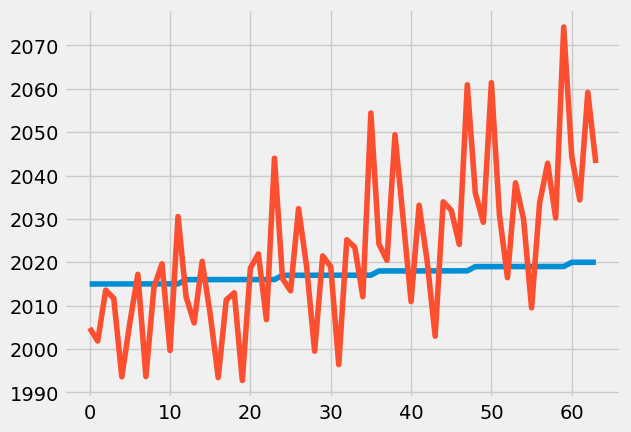

In [124]:
# Plot data
plt.plot(df)

# Discussing the plot: the pattern of sales quantity is increasing over time with drops in sales at the end of each year and peaks mid year. The double peak mid year seems to vary in how high the second peak goes. 

In [125]:
# Perparing the data for decomposition model.
import statsmodels.api as sm

In [129]:
# Resetting the index.
from datetime import datetime
df.reset_index()
df['datetime'] = pd.to_datetime(df['Period'])
df= df.set_index('datetime')
df.drop(['Period'], axis=1, inplace=True)
df.head()

,Sales_quantity
datetime,
2015-01-01,12729.0
2015-01-02,11636.0
2015-01-03,15922.0
2015-01-04,15227.0
2015-01-05,8620.0


In [132]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=6)

In [134]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

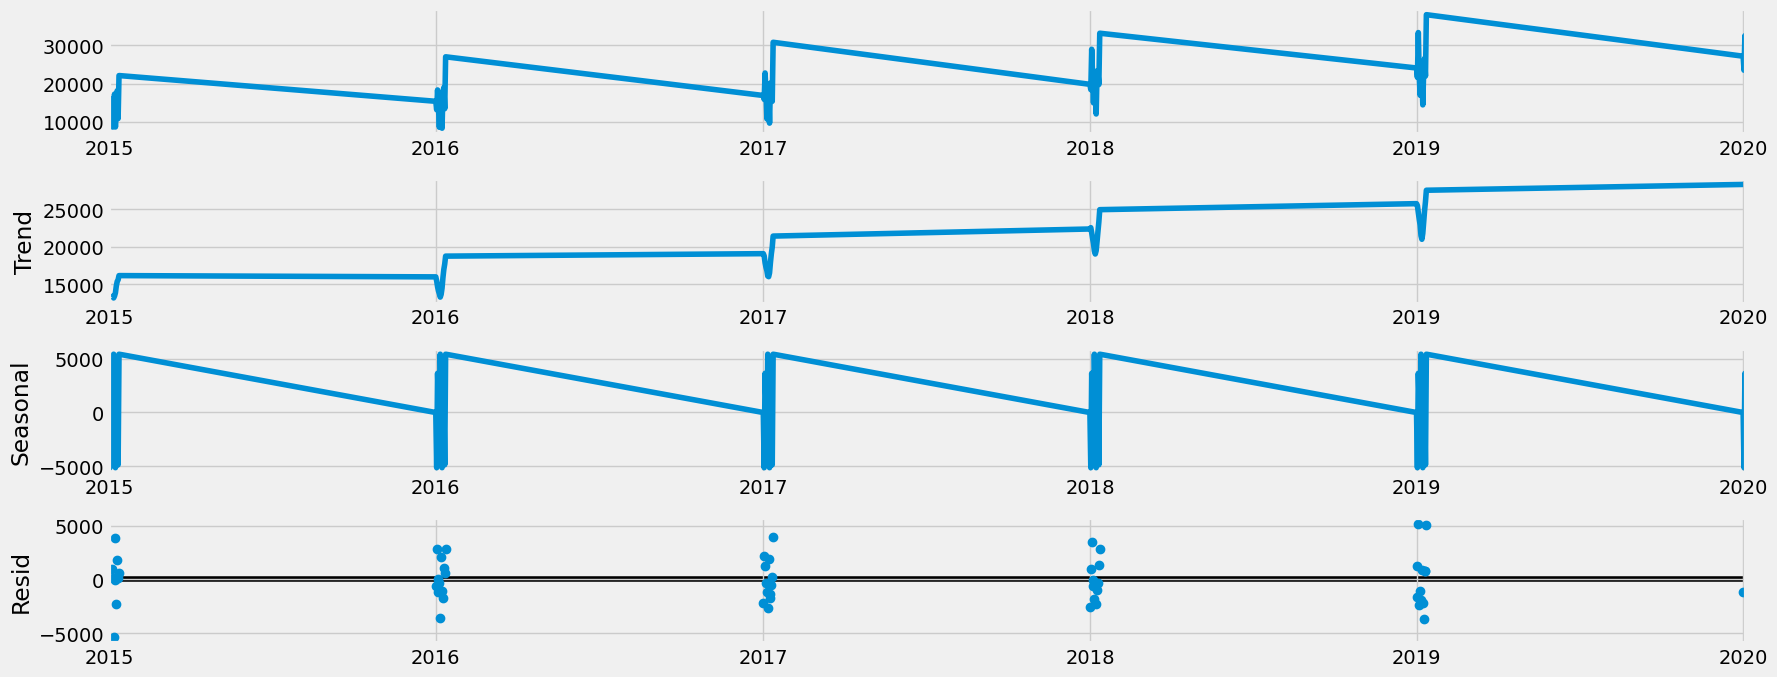

In [135]:
# Plot the decomposition model.

decomposition.plot()
plt.show()

In [138]:
# Testing for stationarity, Dickey-Fuller test.
# Import the model library tool. 
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): 
    
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)


dickey_fuller(df['Sales_quantity'])

Dickey-Fuller Stationarity test:
Test Statistic                  1.157056
p-value                         0.995675
Number of Lags Used            11.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


# The test statistic is 1.15 with a p-value of .99 which means test result is not significant. The test statistic is larger than any of the critical values I might choose so I cannot reject the null hypothesis.  There is a unit root in the data, the data is non-stationary. 

In [140]:
# Stationarizing Data.
# Conducting differencing on data and repeating Dickey=Fuller test.
data_diff = df - df.shift(1)

In [141]:
# Removing missing data caused by differencing. 
data_diff.dropna(inplace = True)

In [142]:
data_diff.head()

,Sales_quantity
datetime,
2015-01-02,-1093.0
2015-01-03,4286.0
2015-01-04,-695.0
2015-01-05,-6607.0
2015-01-06,4540.0


In [143]:
data_diff.columns

Index(['Sales_quantity'], dtype='object')

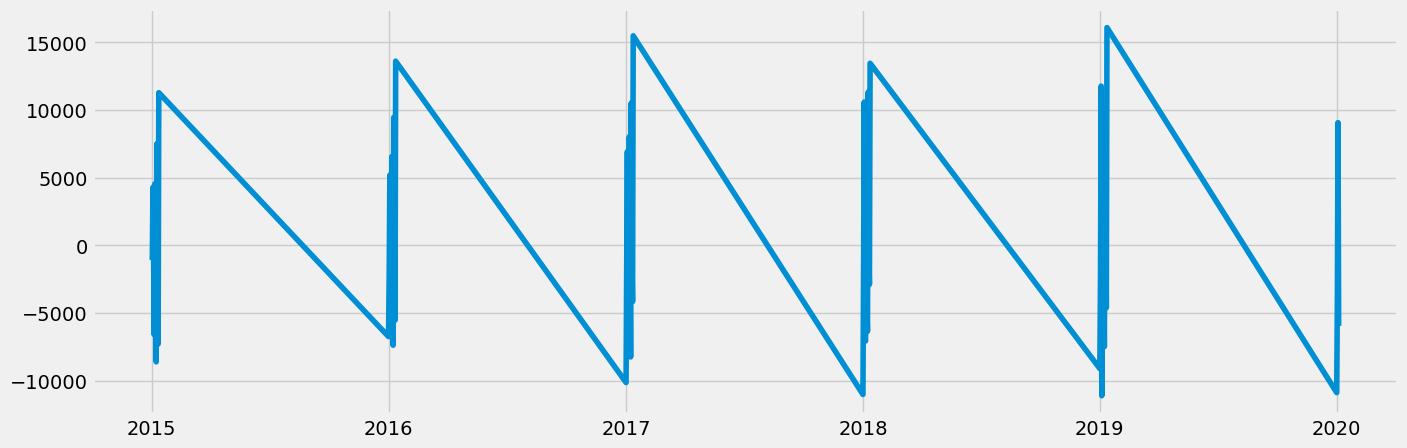

In [144]:
# Checking the plot changes due to differencing. 
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [145]:
# Check for stationarity.
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -9.023001e+00
p-value                        5.708171e-15
Number of Lags Used            1.000000e+01
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


# Check results of round of differencing. Test statistic is smaller than critical value(s), I can reject the null hypothesis. The data is now staionary. 


In [147]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

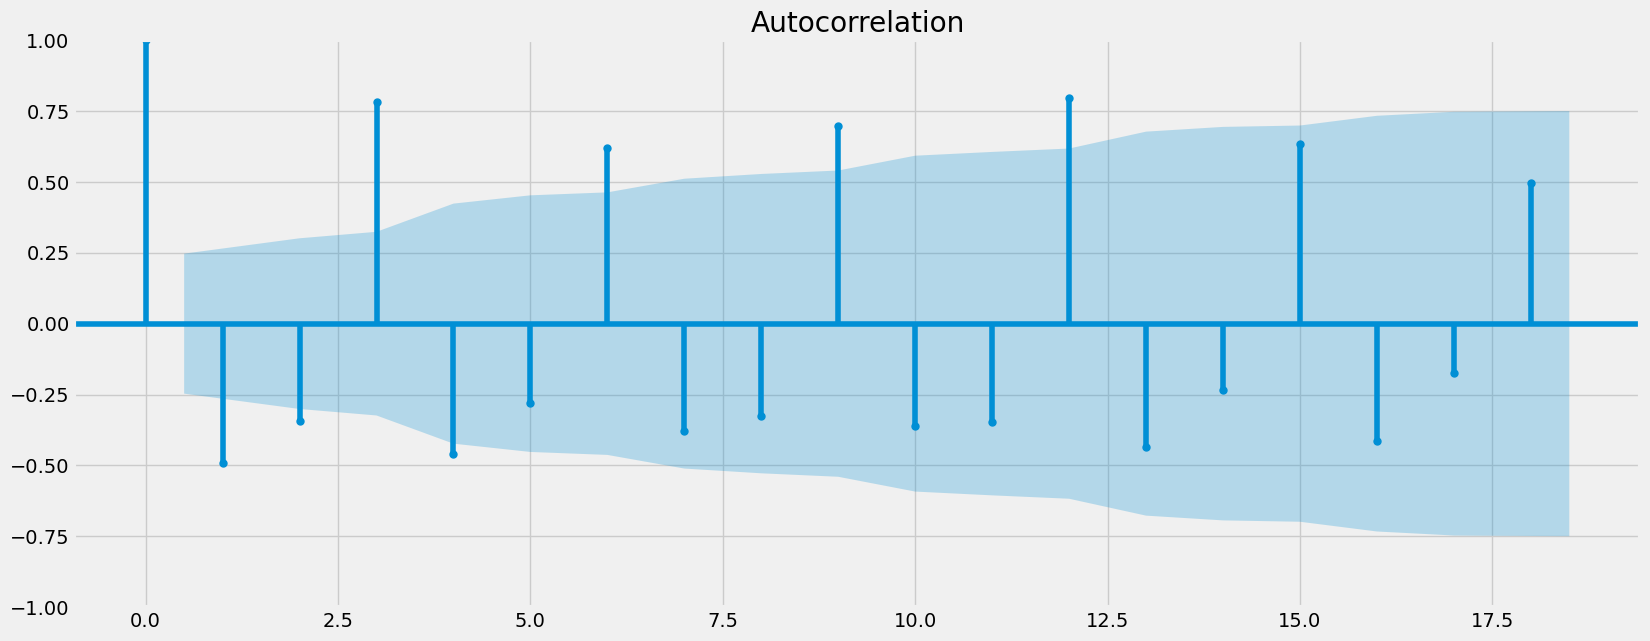

In [148]:
# Checking data's autocorrrelations.
plot_acf(data_diff)
plt.show()

# The autocorrelation shows the stationarity is weak. Another round of differencing to stationarize is necessary.

In [151]:
# Stationarizing Data.
# Conducting differencing on data and repeating Dickey=Fuller test.
data_diff2 = data_diff - data_diff.shift(1)

In [152]:
# Removing missing data caused by differencing. 
data_diff2.dropna(inplace = True)

In [153]:
data_diff2.head()

,Sales_quantity
datetime,
2015-01-03,5379.0
2015-01-04,-4981.0
2015-01-05,-5912.0
2015-01-06,11147.0
2015-01-07,-446.0


In [154]:
data_diff2.columns

Index(['Sales_quantity'], dtype='object')

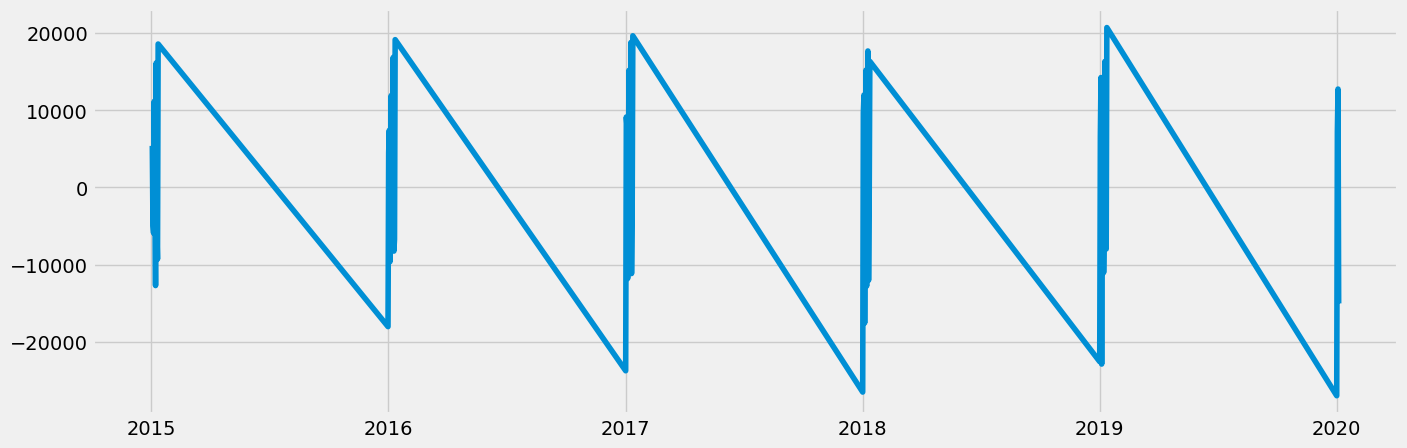

In [155]:
# Checking the plot changes due to second round of differencing. 
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [156]:
# Re-Check for stationarity.
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -9.023001e+00
p-value                        5.708171e-15
Number of Lags Used            1.000000e+01
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


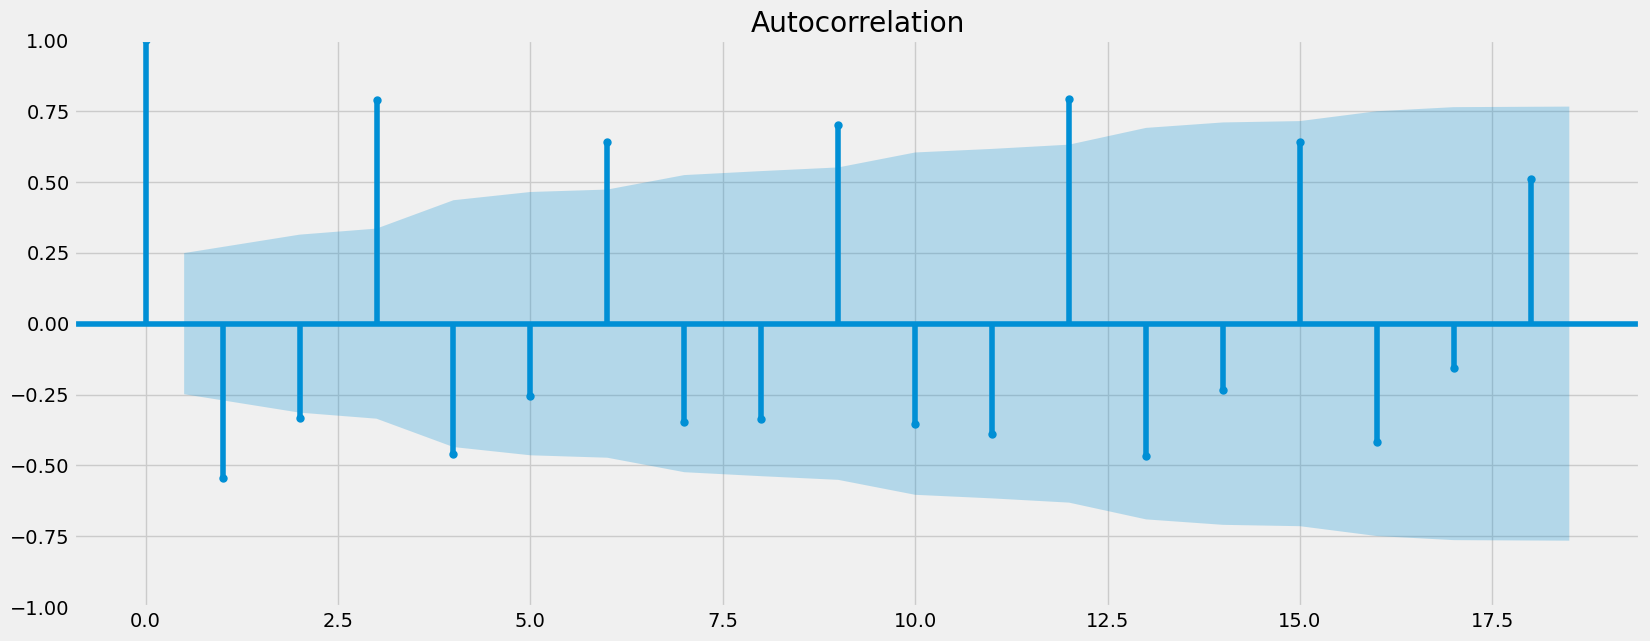

In [157]:
# Checking data's autocorrrelations.
plot_acf(data_diff2)
plt.show()

# Same results, the stationarity is weak for this data. 